In [1]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [2]:
# Cargamos el archivo CSV proporcionado
archivo = 'Transacciones_de_ventas Practicas.csv'
datos = pd.read_csv(archivo)

In [3]:
# Mostramos una vista previa de los datos
print("Vista previa de los datos:")
print(datos.head())

Vista previa de los datos:
    Sector      Tipo     Linea    Sublinea Presentacion  Gramaje  \
0  BEBIDAS  TIPO OAX  DIVERSOS  ISOTONICAS   INDIVIDUAL      0.6   
1  BEBIDAS  TIPO OAX  DIVERSOS  ISOTONICAS   INDIVIDUAL      0.6   
2  BEBIDAS  TIPO OAX  DIVERSOS  ISOTONICAS   INDIVIDUAL      0.6   
3  BEBIDAS  TIPO OAX  DIVERSOS  ISOTONICAS   INDIVIDUAL      0.6   
4  BEBIDAS  TIPO OAX  DIVERSOS  ISOTONICAS   INDIVIDUAL      0.6   

             Empresa   Año     Fecha          Cliente  ...  No._Hijos  \
0  957936 ALFA TORRE  2014  17-01-14  149580 ANDRES G  ...          0   
1  957936 ALFA TORRE  2014  17-01-14  149580 ANDRES G  ...          0   
2  957936 ALFA TORRE  2014  17-01-14  149580 ANDRES G  ...          0   
3  957936 ALFA TORRE  2014  17-01-14  149580 ANDRES G  ...          0   
4  957936 ALFA TORRE  2014  22-01-14  100861 MARIA DE  ...          0   

   Antiguedad  Edad  Edad_Rango  Escolaridad Estado_Civil      Estado  \
0          11    35     30 - 39  Sin asignar      So

In [4]:
columns_to_use = ['Antiguedad', 'Edad', 'No._Hijos','Sexo','Estado_Civil']
data_cleaned = datos[columns_to_use]  # Filtramos las columnas seleccionadas

In [5]:
# Codificamos las variables categóricas (si las hubiera) a valores numéricos usando LabelEncoder
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    # Para cada columna categórica, convertimos las categorías en números
    label_encoders[column] = LabelEncoder()
    data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])

C:\Users\ingjo\AppData\Local\Temp\ipykernel_22288\1032843050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])
C:\Users\ingjo\AppData\Local\Temp\ipykernel_22288\1032843050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])


In [6]:
# Definimos las variables independientes (X) y la variable objetivo (y)
# Usamos solo 'Edad' y 'Sector' para visualizar el gráfico en 2D
X = data_cleaned[['Antiguedad', 'Edad', 'No._Hijos','Sexo']]
y = data_cleaned['Estado_Civil']

In [7]:
columnas=X.columns
# Dividimos los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Creación del modelo de árbol de decisión
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Predicciones sobre el conjunto de prueba
predicciones = modelo.predict(X_test)

In [10]:
# Resultados numéricos
print("\nReporte de clasificación:")
print(classification_report(y_test, predicciones))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6943
           1       1.00      0.94      0.97       563
           2       1.00      0.75      0.86        72
           3       1.00      0.98      0.99       241
           4       0.99      0.99      0.99      9775
           5       1.00      0.70      0.82        20
           6       1.00      1.00      1.00        57

    accuracy                           0.99     17671
   macro avg       1.00      0.91      0.94     17671
weighted avg       0.99      0.99      0.99     17671



In [11]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, predicciones))

Matriz de confusión:
[[6886    0    0    0   57    0    0]
 [  31  532    0    0    0    0    0]
 [   0    0   54    0   18    0    0]
 [   5    0    0  235    1    0    0]
 [ 128    0    0    0 9647    0    0]
 [   6    0    0    0    0   14    0]
 [   0    0    0    0    0    0   57]]


In [12]:
print("Precisión del modelo:")
print(accuracy_score(y_test, predicciones))

Precisión del modelo:
0.9860788863109049


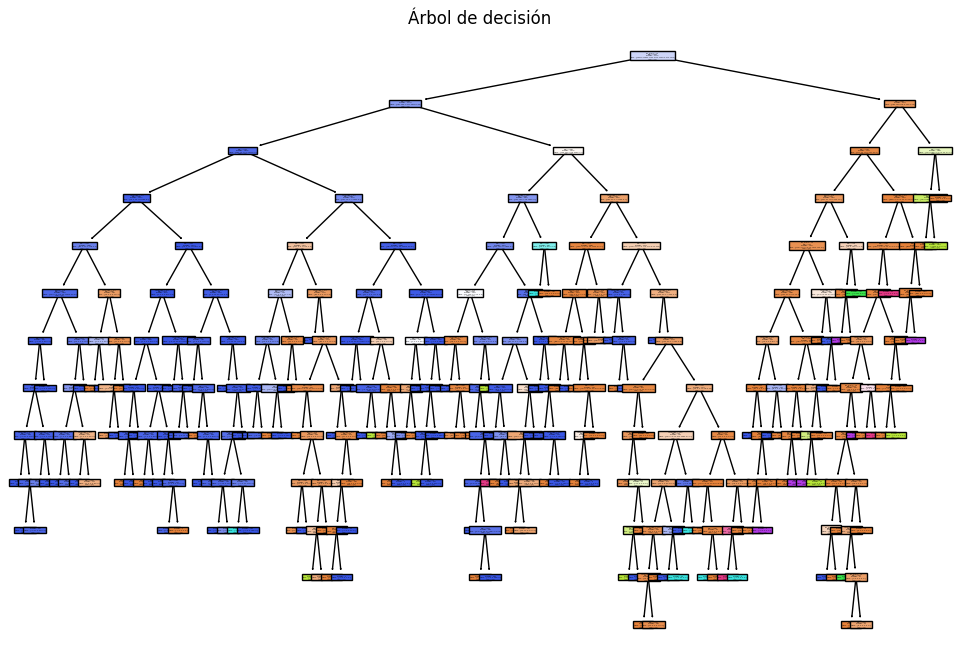

In [13]:
# Gráfico del árbol de decisión
plt.figure(figsize=(12,8))
tree.plot_tree(modelo, filled=True, feature_names=columnas,class_names=True)
plt.title("Árbol de decisión")
plt.show()

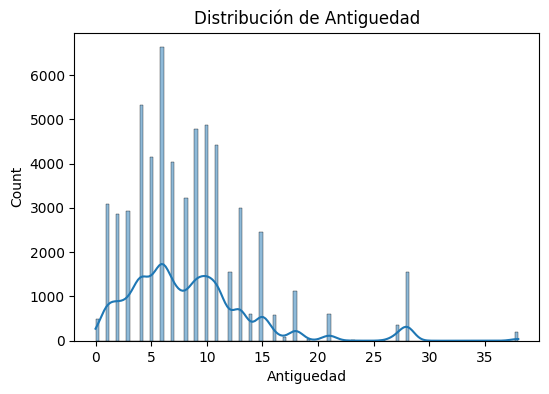

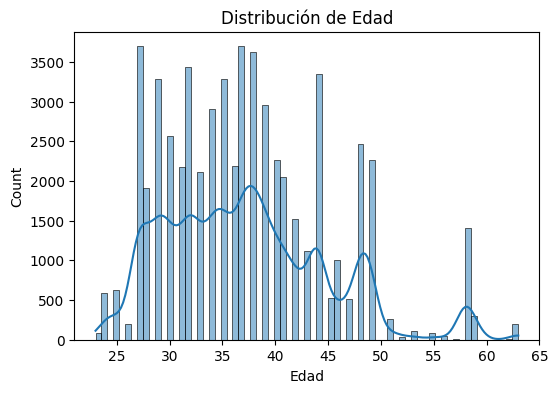

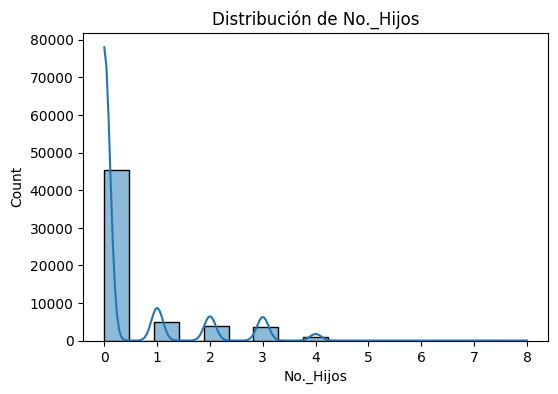

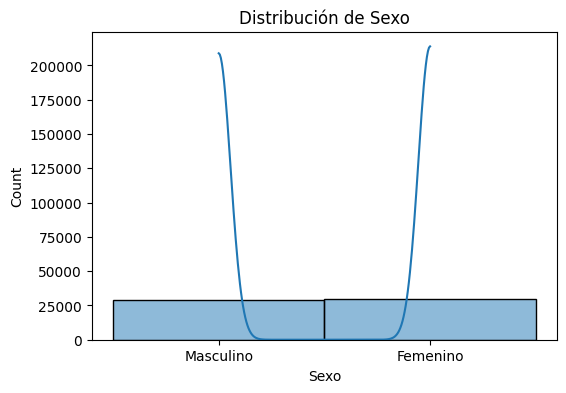

In [14]:
# Graficar algunas distribuciones de las variables independientes
for var in X:
    plt.figure(figsize=(6,4))
    sns.histplot(datos[var], kde=True)
    plt.title(f"Distribución de {var}")
    plt.show()

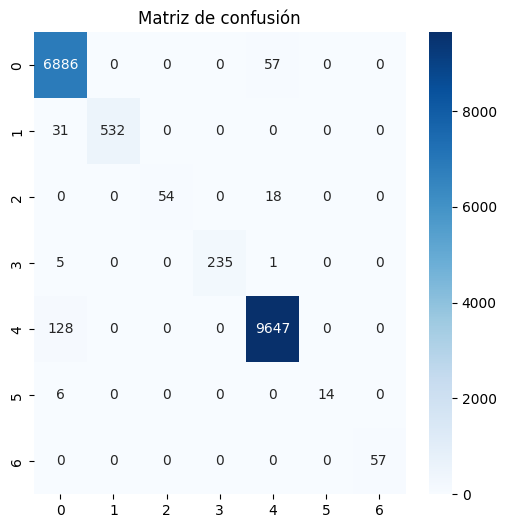

In [15]:
# Graficar la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.show()